**Data Description:**

This is a  sentiment analysis job about the problems of each major U.S. airline.

This involves analysis of  Twitter data that was scraped from February of 2015 .
Our job is  to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone


Therefore, the process of understanding if a tweet is positive / negative/neutral can be automated as the machine learns different techniques from the domain of Natural Language Processing.
Here we plan to use the 


Supervised models - Some popular techniques used for encoding text

1.   Bag of Words
2.   TF-IDF (Term Frequency - Inverse Document Frequency)



**Importing the libraries**

In [1]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 367.3 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading data into pandas dataframe
tweets = pd.read_csv("/content/drive/MyDrive/NLp/Tweets.csv")

In [4]:
# Creating the copy of the data frame
data = tweets.copy()

In [5]:
data.shape  

(14640, 15)

There are 15 columns

In [ ]:
data.shape  

In [6]:
data.isnull().sum(axis=0)  

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Among the 15 columns there are quiete a number of columns that have missing values.
But for the purpose of analysis we need two columns airline_sentiment and text hence we consider that

**Exploratory Data Analysis (EDA)**

In [ ]:
data.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [ ]:
# Print shape of data
data.shape   

(14640, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [15]:
# checking for duplicate values
data.duplicated().sum()

36

In [16]:
# Checking for missing values
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

The output shows the number of missing values for each column in the DataFrame. For example, the column "negativereason" has 5,462 missing values, the column "tweet_coord" has 13,621 missing values, and so on. The column "airline_sentiment_gold" and "negativereason_gold" have the highest number of missing values with 14,600 and 14,608 respectively.

In [34]:
# drop the columns with missing values
data = data.dropna(axis=1)


In [36]:
# Checking for missing values
data.isna().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

since "airline_sentiment" and "text" are the important columns we are good for analysis,

In [17]:
data.tail(3)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
from wordcloud import WordCloud

In [11]:
# check the count of each labels
data['airline_sentiment'].value_counts()    

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

**Word cloud with out processing the data**

In [12]:
from wordcloud import WordCloud,STOPWORDS

In [27]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'negative']

# joining the negative reviews using space separator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

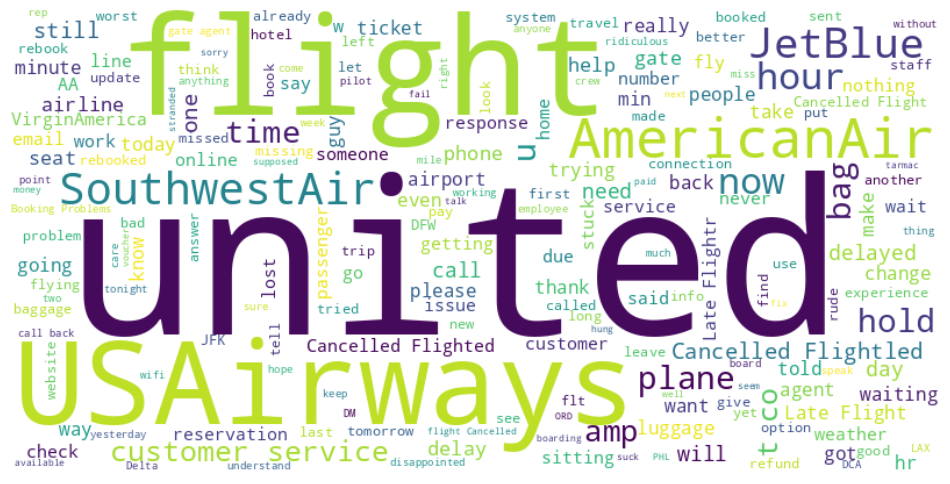

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create a WordCloud object with some basic options
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_word)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The negative sentiment has : United, US Airways, AMerican Air, Southwest air.
In addition : Customer service, reservations, cancelled, waiting, ticket, hour, problem are some negative sentiments expressed.

In [29]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'positive']

# joining the negative reviews using space separator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

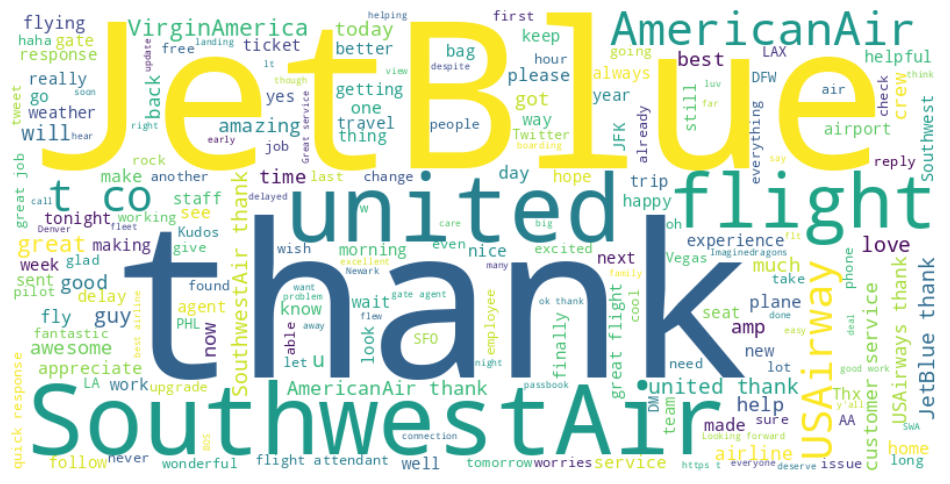

In [31]:
# Create a WordCloud object with some basic options
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_word)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Thank is the top word !. Southwest Air, JEtblue United, Americam are positves,
Best, love, change, thank, service, experience, kudos, better, helpful are positve sentiments seen

In [32]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'neutral']

# joining the negative reviews using space separator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

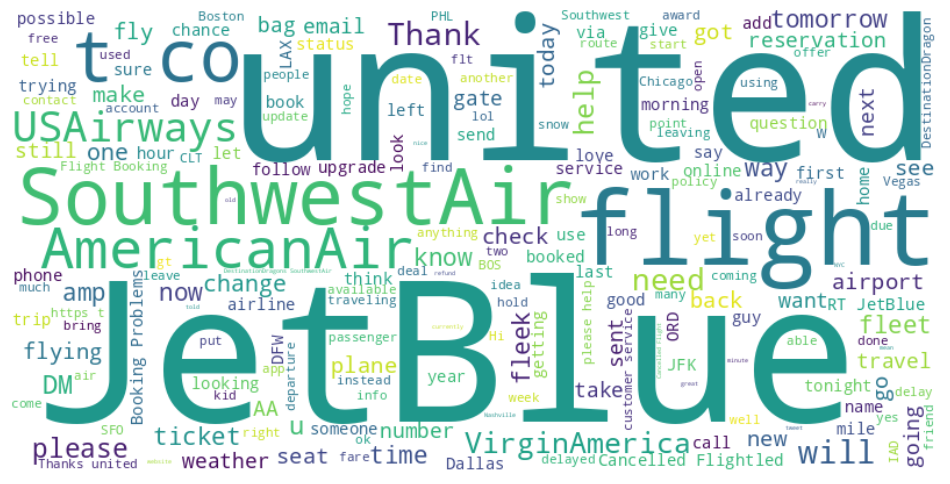

In [33]:
# Create a WordCloud object with some basic options
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_word)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

United, Jetblue, Southwest Air, American are some neutral airlines, 
Change, weatherm cancelled, fleet, are some sample sentiments

**Preprocessing  the data. T**




Replace contractions in string. (e.g. replace I'm --> I am) and so on.
Remove numbers.
Tokenization.
Remove Stopwords.
Lemmatized data.
We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words. 

In [ ]:
# this library is used to expand contractions
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Helps to extract the data using regular expressions
import re
import nltk
import contractions
nltk.download('punkt')
nltk.download('all')

from nltk.corpus import stopwords
from nltk import word_tokenize
# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_d



*   Remove html tags.
*  Replace contractions in string. (e.g. replace I'm --> I am) and so on.
*   Remove numbers.
*  Tokenization.
*   Remove Stopwords.
*   Lemmatized data.
*  We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.




In [ ]:
# function for text pre-processing
def clean_text(df, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', df)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', df)

    # Removing the punctuations using regular expression
    # i.e remove anything which is not word or whitespace character
    
    string = re.sub(r'[^\w\s]', '', df)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stopwords.words('english')])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    #tokenize data
    string = word_tokenize(string)

    #remove number
    string=[s for s in string if s.isalpha()]

    #lemmatize the data
    string= [WordNetLemmatizer().lemmatize(i) for i in string]

    #fix contractions (example: "'cause": "because","could've": "could have",etc)
    string = ' '.join([contractions.fix(word) for word in string])


    return string 
    #return " ".join(string)       


In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: clean_text(x))
data.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [ ]:
data['airline_sentiment'] = data.apply(lambda row: nltk.word_tokenize(row['airline_sentiment']), axis=1) # Tokenization of data
data.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,[neutral],1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,[positive],0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,[neutral],0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [ ]:
data["text"] = data["text"].astype(str) 
data['clean_text'] = data['text'].apply(clean_text)

<ipython-input-127-80ab9f77c4c2>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


**Word Clouds with Processed Data**

In [ ]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'negative']

# joining the negative reviews using space separator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['clean_text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

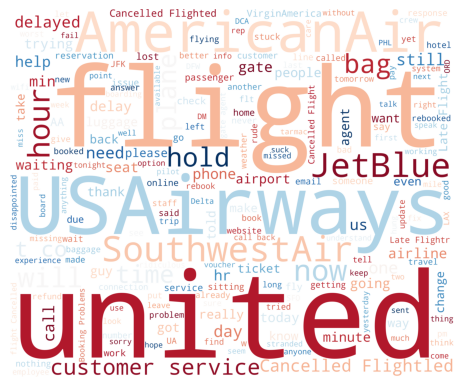

In [ ]:

# Creating word cloud
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                      ).generate(cleaned_word)

# Displaying the word cloud using matplotlib
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

So the NEGATIVE WORK CLOUD has mostly : United , US Airways, Jetblue, American Air, in addition to cancelled flighted, delayed, hold, late , customer service
waiting, phome, change, late flight etc. 

In [ ]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'positive']

# joining the negative reviews using space separator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['clean_text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

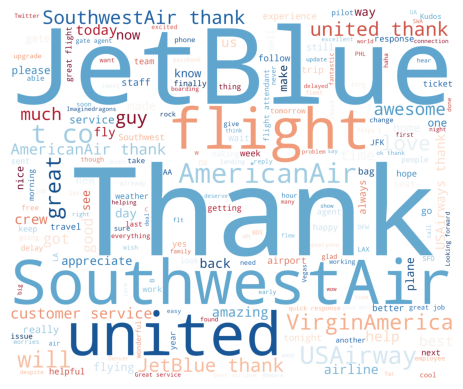

In [ ]:
# Creating word cloud
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                      ).generate(cleaned_word)

# Displaying the word cloud using matplotlib
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The positive word cloud has Jetblue, Southwest, United, American 
in additon to "great, nice, thank, helpful, amazinb, etc, 

In [ ]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'neutral']

# joining the negative reviews using space separator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['clean_text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

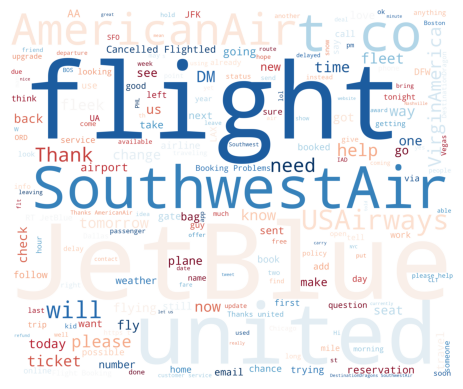

In [ ]:
# Creating word cloud
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                      ).generate(cleaned_word)

# Displaying the word cloud using matplotlib
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The neutral sentiment has : Southwest, Thank, Will, today, reservation, cancelled, flightled, going, etc

**Additional data cleaning on the clean_text**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words = list(set(stop_words)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def lemmatize(word):
    """Lemmatize a word"""
    lemma = lemmatizer.lemmatize(word, pos='v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word, pos='n')
    return lemma

def lemmatize_list(words):
    """Lemmatize a list of words"""
    lem_list = [lemmatize(word) for word in words]
    return lem_list

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
data['text'] = data.apply(lambda row: normalize(row['clean_text']), axis=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Supervised Learning for Sentiment Analysis**

**Bag of Words (CountVectorizer)**
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['clean_text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape 

(14640, 500)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english', ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
corpus = ["This is the first document.", "This is the second document.", "And this is the third one.", "Is this the first document?"]
top_words = top_n_words(corpus, n=10)
print(top_words)


[('document', 3), ('second', 1)]


Bag-of-Words

In [ ]:
def top_n_ngram(corpus, n = None, ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis =0) 
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

<Axes: xlabel='Frequent Words '>

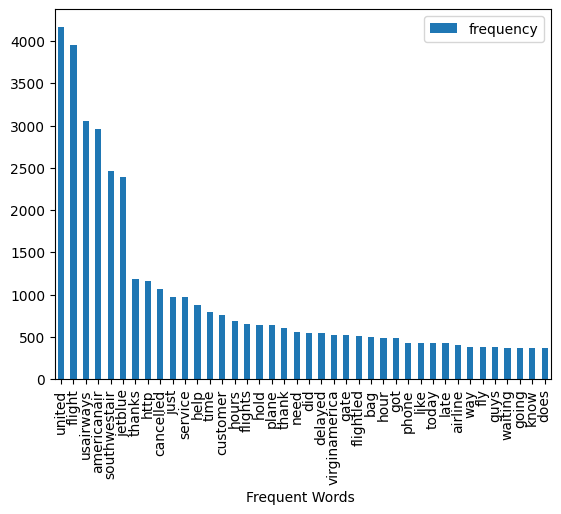

In [ ]:
words = top_n_ngram(data['clean_text'], 40, 1)
df_s = pd.DataFrame(words, columns=['Frequent Words ', 'frequency'])
df_s.plot(kind='bar', x='Frequent Words ')

Above bar-graph shows the top 40 words used in count vectoriser

**Bag-0f words**

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['clean_text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape  #Shape of the feature vector

(14640, 500)

In [ ]:
# fit and transforming into vectors from the text data
vectors = cv.fit_transform(data['clean_text']).toarray()

In [ ]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", cv.vocabulary_)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vectors)

Vocabulary:  {'virginamerica': 178, 'what': 187, 'you': 198, 'have': 72, 'to': 163, 'the': 153, 'experience': 51, 'did': 43, 'not': 111, 'today': 164, 'need': 106, 'take': 148, 'another': 12, 'trip': 169, 'it': 86, 'is': 85, 'really': 131, 'in': 84, 'your': 199, 'they': 158, 'and': 11, 'about': 1, 'would': 196, 'flight': 53, 'for': 59, 'seats': 135, 'that': 152, 'this': 159, 'only': 119, 'flying': 58, 'yes': 197, 'time': 162, 'fly': 57, 'will': 192, 'go': 64, 'there': 157, 'co': 35, 'but': 27, 'now': 112, 'do': 45, 'was': 182, 'an': 10, 'hour': 78, 'are': 14, 'too': 167, 'good': 66, 'me': 100, 'know': 90, 'because': 22, 'of': 114, 'so': 142, 'much': 104, 'than': 149, 'great': 68, 'my': 105, 'even': 49, 'on': 116, 'am': 8, 'again': 3, 'all': 7, 'from': 60, 'travel': 168, 'http': 82, 'thanks': 151, 'still': 147, 'first': 52, 'last': 91, 'could': 36, 'seat': 134, 'due': 47, 'two': 171, 'help': 73, 'be': 21, 'please': 129, 'want': 181, 'with': 193, 'why': 191, 'over': 124, 'more': 103, 'ot

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['positive', 'negative','neutral'], yticklabels = ['positive', 'negative','neutral'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [ ]:
# Independent feature
X = vectors

# Target feature
y = data["airline_sentiment"].map({'negative':-1,'positive':1, 'neutral':-0})

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [ ]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (11712, 200)
Shape of test set :  (2928, 200)
Percentage of classes in training set:
-1    0.626964
 0    0.211663
 1    0.161373
Name: airline_sentiment, dtype: float64
Percentage of classes in test set:
-1    0.626708
 0    0.211749
 1    0.161544
Name: airline_sentiment, dtype: float64


In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 42)

# fitting the model on training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      7343
           0       0.97      0.99      0.98      2479
           1       0.98      0.97      0.98      1890

    accuracy                           0.99     11712
   macro avg       0.98      0.98      0.98     11712
weighted avg       0.99      0.99      0.99     11712



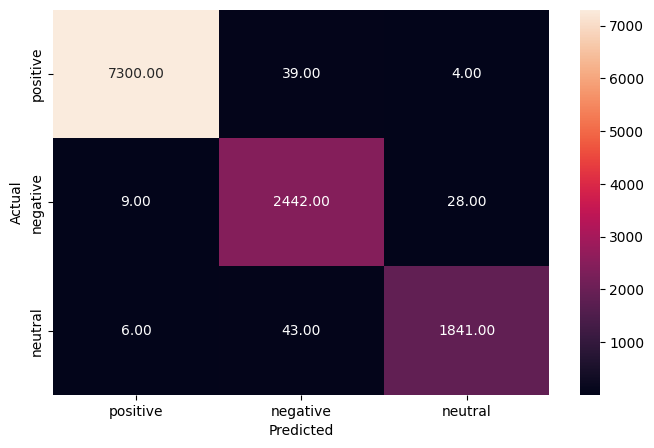

In [ ]:
# making predictions on the test set
y_pred_train = model.predict(X_train)

metrics_score(y_train, y_pred_train)

Accuracy of the training model is :  99%

**Model performance on the testing data**

              precision    recall  f1-score   support

          -1       0.78      0.92      0.84      1835
           0       0.59      0.41      0.48       620
           1       0.74      0.51      0.60       473

    accuracy                           0.75      2928
   macro avg       0.70      0.61      0.64      2928
weighted avg       0.73      0.75      0.73      2928



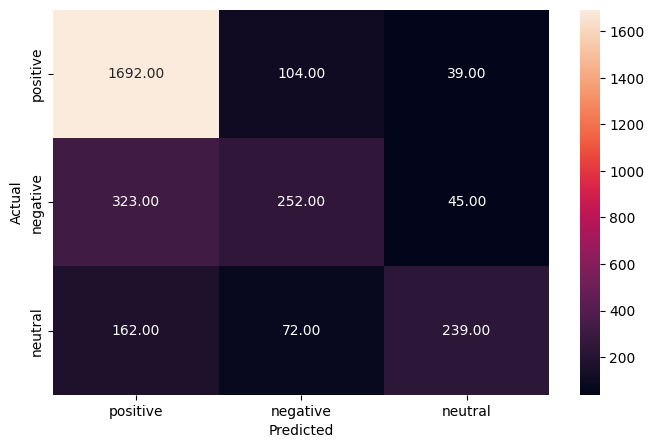

In [ ]:
# making predictions on the test set
y_pred = model.predict(X_test)

metrics_score(y_test, y_pred)

Random Forest model is able to perform well for classes present in the data on training and testing data through Bag of Words vectors.

The overall accuracy is 75%.
FOr negative sentiment the f1 score is 84%, for neutral it is 41% and for positive the recall is 51%. 




flight,fleet,denver,found,flightled,clt,home,delta,call,claim,air,booked,days,best,dfw,give,good,chicago,finally,hope,class,around,anyone,destination,agents,cool,check,cancelled,crew,bag,flighted,had,airport,flying,another,here,booking,hey,come,changed,
 
 


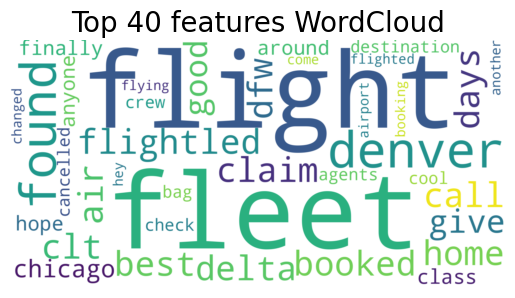

In [ ]:
all_features = Count_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()



so the top 40 words are as above.
flight, fleet, found, best, delta, agents, denevr, dfw ,chicago

**TF-IDF**
Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['clean_text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [ ]:
X = data_features
# Target feature
y = data["airline_sentiment"].map({'negative':-1,'positive':1, 'neutral':-0})

In [ ]:
# Independent feature
X = tf_vectors

# Target feature
y = data["airline_sentiment"].map({'negative':-1,'positive':1, 'neutral':-0})

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [ ]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (11712, 40)
Shape of test set :  (2928, 40)
Percentage of classes in training set:
-1    0.626964
 0    0.211663
 1    0.161373
Name: airline_sentiment, dtype: float64
Percentage of classes in test set:
-1    0.626708
 0    0.211749
 1    0.161544
Name: airline_sentiment, dtype: float64


In [ ]:
# intializing the Random Forest model
model2 = RandomForestClassifier(random_state = 42)

In [ ]:

# fitting the model on training set
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model performance on the training data**

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7343
           0       0.99      0.98      0.99      2479
           1       0.98      0.99      0.99      1890

    accuracy                           0.99     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       0.99      0.99      0.99     11712



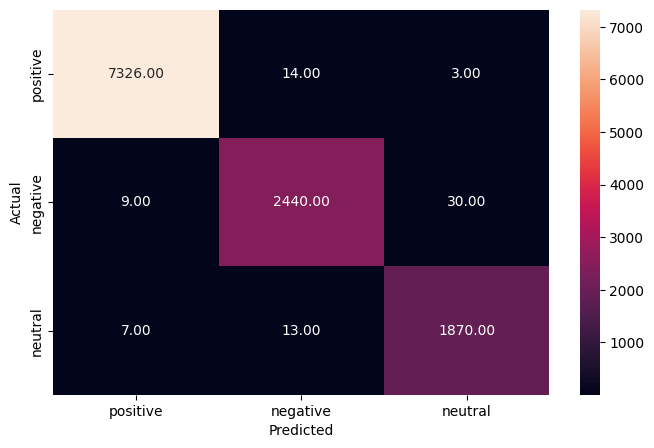

In [ ]:
# making predictions on the test set
y_pred_train = model2.predict(X_train)

metrics_score(y_train, y_pred_train)

model accuracy is 99%

Model performance on the testing data
[ ]


              precision    recall  f1-score   support

          -1       0.79      0.93      0.85      1835
           0       0.66      0.45      0.54       620
           1       0.77      0.52      0.62       473

    accuracy                           0.77      2928
   macro avg       0.74      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



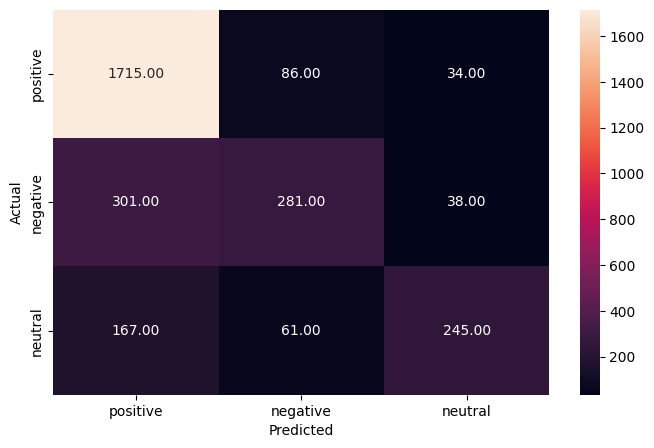

In [ ]:
# making predictions on the test set
y_pred = model2.predict(X_test)

metrics_score(y_test, y_pred) 

The testing accuracy was 77% with an macro average score of 62%.
The F1-score for the class 1 is 56%%, neutral ( 0) is 45% and positive (1) is 56%

another, at, anything, also, any, american, and, app, air, almost, an, about, ago, appreciate, able, am, agent, all, already, again, americanair, airport, airways, amazing, always, as, agents, airline, attendant, are, account, asked, answer, anyone, aa, actually, after, add, around, airlines, 
 
 


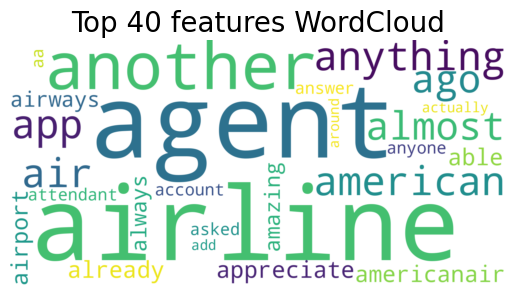

In [ ]:
all_features = tfidf_vect.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF**

In [ ]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['model'] = count_vectorizer_predicted
df['model2'] = tf_idf_predicted
df.head()

,y_test,model,model2
0,0,-1,-1
1,1,-1,-1
2,-1,1,1
3,-1,-1,-1
4,-1,-1,-1


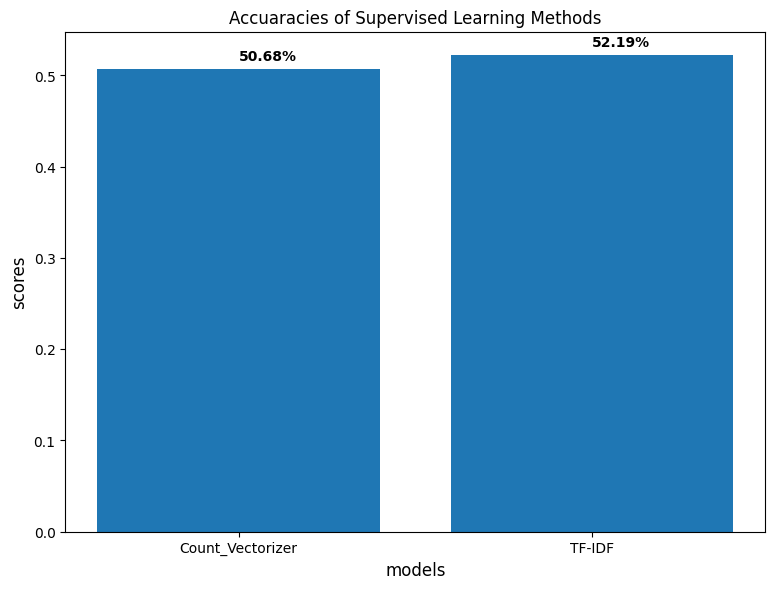

In [ ]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

Summary:

TF-IDF shows a** better performance than Count Vectorizer,** because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions. **bold text**

Conclusions

The below are the takeaway points from the above case study
**Exploratory Data Analysis.**
Text preprocessing methods: We used all the methods, . Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert them back to text string in the data frame. -
**Working on Encoding text data using Count Vectorizer and TF-IDF and classifying them using Machine learning models.**

Comparing the Machine learning models' performance with Sentiment Analysis using Python packages to check which one gave better and more accurate results.